<span style="color:olive; font-size:20px;">Data Cleaning</span>

<span style="color:salmon; font-size:20px;">EDA</span>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_1=pd.read_csv("/Users/hp/Downloads/adult.csv")
df_2=pd.read_csv("/Users/hp/Downloads/adult_test.csv")
df=pd.concat([df_1,df_2],ignore_index=True)
print(df.head())
print(df.shape)

    0                  1       2           3   4                    5  \
0  39          State-gov   77516   Bachelors  13        Never-married   
1  50   Self-emp-not-inc   83311   Bachelors  13   Married-civ-spouse   
2  38            Private  215646     HS-grad   9             Divorced   
3  53            Private  234721        11th   7   Married-civ-spouse   
4  28            Private  338409   Bachelors  13   Married-civ-spouse   

                    6               7       8        9    10  11  12  \
0        Adm-clerical   Not-in-family   White     Male  2174   0  40   
1     Exec-managerial         Husband   White     Male     0   0  13   
2   Handlers-cleaners   Not-in-family   White     Male     0   0  40   
3   Handlers-cleaners         Husband   Black     Male     0   0  40   
4      Prof-specialty            Wife   Black   Female     0   0  40   

               13      14  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K  
3   United-State

In [3]:
print(df.describe())

                  0             2             4            10            11  \
count  48842.000000  4.884200e+04  48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05     10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05      2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04      1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05      9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05     10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05     12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06     16.000000  99999.000000   4356.000000   

                 12  
count  48842.000000  
mean      40.422382  
std       12.391444  
min        1.000000  
25%       40.000000  
50%       40.000000  
75%       45.000000  
max       99.000000  


In [4]:
print(df.isna().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64


In [5]:
print((df==0).sum())

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10    44807
11    46560
12        0
13        0
14        0
dtype: int64


<span style="color:olive;">Cleaning/Preprocessing 1 (giving appropriate labels to columns)</span>

In [6]:
df.columns=["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"]
# giving names to columns

In [7]:
print(df.head())

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50

In [8]:
print((df==0).sum())

age                   0
workclass             0
fnlwgt                0
education             0
education-num         0
marital-status        0
occupation            0
relationship          0
race                  0
sex                   0
capital-gain      44807
capital-loss      46560
hours-per-week        0
native-country        0
income                0
dtype: int64


In [9]:
print(df.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


<span style="color:olive;">Cleaning/Preprocessing 2 (dropping columns)</span>

In [10]:
df=df.drop(columns=["capital-gain","capital-loss"]) #dropping columns with significant null values

checking for unique values to find out unnecessary values or rquirement for binning etc

In [11]:
columns1=["age","workclass","fnlwgt","education","education-num"]#checking for unique values in each coluns one by one
for i in columns1:
    print(df[i].unique())

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[ 77516  83311 215646 ... 173449  89686 350977]
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


In [12]:
columns2=["marital-status","occupation","relationship","race","sex"]
for i in columns2:
    print(df[i].unique())

[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
[' Male' ' Female']


In [13]:
columns3=["hours-per-week","native-country","income"]
for i in columns3:
    print(df[i].unique())

[40 13 16 45 50 80 30 35 60 20 52 44 15 25 38 43 55 48 58 32 70  2 22 56
 41 28 36 24 46 42 12 65  1 10 34 75 98 33 54  8  6 64 19 18 72  5  9 47
 37 21 26 14  4 59  7 99 53 39 62 57 78 90 66 11 49 84  3 17 68 27 85 31
 51 77 63 23 87 88 73 89 97 94 29 96 67 82 86 91 81 76 92 61 74 95 79 69]
[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']
[' <=50K' ' >50K' ' <=50K.' ' >50K.']


<span style="color:olive;">Cleaning/Preprocessing 3 (removing space in columns)</span>

In [14]:
df=df.apply(lambda x: x.str.strip() if x.dtype=="object" else x)#stripping extra space in object type columns

<span style="color:olive;">Cleaning/Preprocessing 4 (checking for ? in columns to replcae with new value)</span>

In [15]:
print((df["workclass"]=='?').sum())#checking sum of values with ?
print((df["occupation"]=='?').sum())
print((df["native-country"]=='?').sum())

2799
2809
857


In [16]:
df=df[df["native-country"]!="?"]#dropping rows as less number of such values

In [17]:
mode_workclass=df["workclass"].mode()[0]# applying mode to other columns to replace with ?
df=df.copy()
df.loc[:,"workclass"]=df["workclass"].apply(lambda x: mode_workclass if x=="?" else x)

mode_occupation=df["occupation"].mode()[0]
df=df.copy()
df.loc[:,"occupation"]=df["occupation"].apply(lambda x: mode_occupation if x=="?" else x)


<span style="color:olive;">Cleaning/Preprocessing 5 (column datatype conversion and check)</span>

In [18]:
columns_numerical=["age","fnlwgt","education-num","hours-per-week"]# converting datatype of numerical columns
for i in columns_numerical:
    df[i]=pd.to_numeric(df[i],errors="coerce")

In [19]:
print(df.isna().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
income            0
dtype: int64


<span style="color:olive;">Cleaning/Preprocessing 6 (dropping duplicates if any)</span>

In [20]:
df.drop_duplicates(inplace=True)#dropping duplicates in the dataset

In [21]:
print(df.shape)

(47955, 13)


<span style="color:olive;">Cleaning/Preprocessing 3 (replacing - to space)</span>

In [22]:
df=df.apply(lambda x: x.str.replace("-"," ") if x.dtype=="object" else x)# replacing "-" to " "

<span style="color:olive;">Cleaning/Preprocessing 7 (converting string to lower to ensure equal type of alphabets)</span>

In [23]:
df=df.apply(lambda x: x.str.lower() if x.dtype=="object" else x)# converting string to lower case

In [24]:
print(df.min())
print(df.max())

age                               17
workclass                federal gov
fnlwgt                         12285
education                       10th
education-num                      1
marital-status              divorced
occupation              adm clerical
relationship                 husband
race              amer indian eskimo
sex                           female
hours-per-week                     1
native-country              cambodia
income                         <=50k
dtype: object
age                             90
workclass              without pay
fnlwgt                     1490400
education             some college
education-num                   16
marital-status             widowed
occupation        transport moving
relationship                  wife
race                         white
sex                           male
hours-per-week                  99
native-country          yugoslavia
income                       >50k.
dtype: object


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [26]:
print(df.shape)

(47955, 13)


<span style="color:olive;">Cleaning/Preprocessing 3 (removing . from income column)</span>

In [27]:
df["income"]=df["income"].replace({"<=50k.":"<=50k",">50k.":">50k"})# proper formatting of income column

<span style="color:olive;">Cleaning/Preprocessing 8 (binning of skewed columns)</span>

In [28]:
df["age_group"]=pd.cut(df["age"], bins=4, labels=["young","middle aged","senior","elder"])# binning extreme values for quality dataset
df["hours-per-week-cat"]=pd.cut(df["hours-per-week"],bins=4, labels=["less","ideal","more","extreme"])
df["education-num-cat"]=pd.cut(df["education-num"],bins=5,labels=["basic","lower","intermediate","higher","very high"])

In [29]:
import matplotlib.pyplot as plt

<span style="color:salmon;"> EDA 1(outlier detection with z score)</span>

In [30]:
for i in columns_numerical:# outlier detaction with z score
    z_score=np.abs(stats.zscore(df[i]))
    outliers=df[z_score>3]
    print(f"outliers for {i}:{len(outliers)}")
    

outliers for age:180
outliers for fnlwgt:493
outliers for education-num:319
outliers for hours-per-week:668


<span style="color:salmon;"> EDA 2(boxplot for outliers)</span>

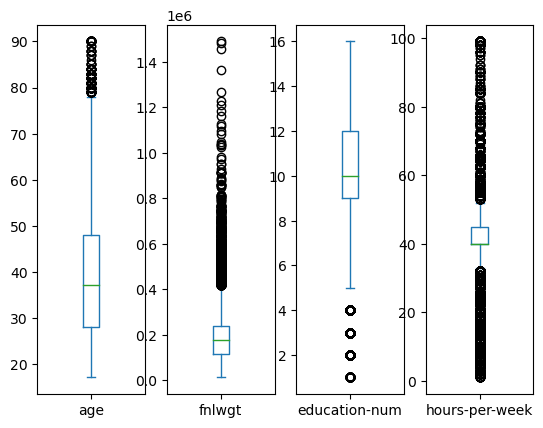

In [31]:
df[columns_numerical].plot(kind="box",subplots=True)# boxplot to find outliers in columns
plt.show()

<span style="color:salmon;"> EDA 3(distribution checking with histplot)</span>

<AxesSubplot:xlabel='hours-per-week', ylabel='Count'>

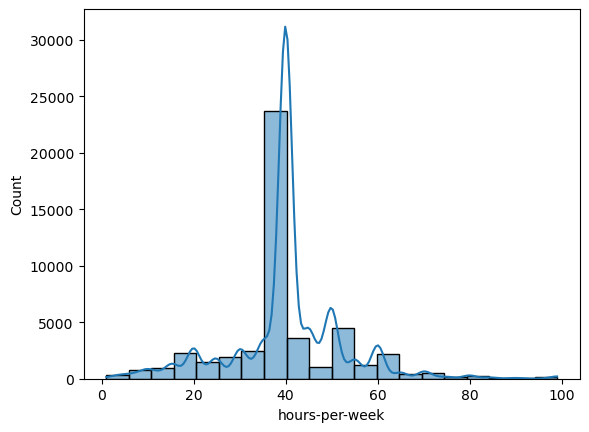

In [32]:
sns.histplot(data=df,x="hours-per-week",kde=True,bins=20)#histplot to check distribution of data

<AxesSubplot:xlabel='fnlwgt', ylabel='Count'>

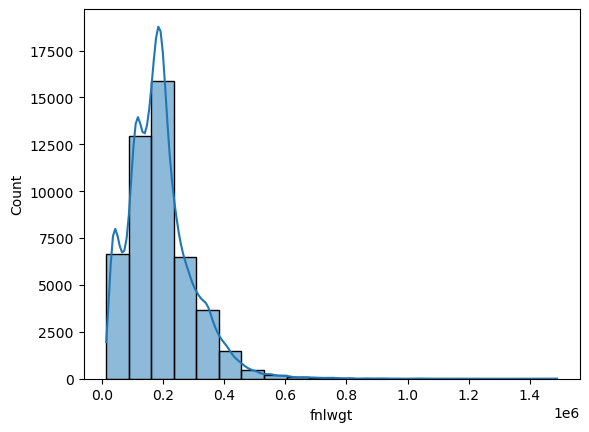

In [33]:
sns.histplot(data=df,x="fnlwgt",kde=True,bins=20)

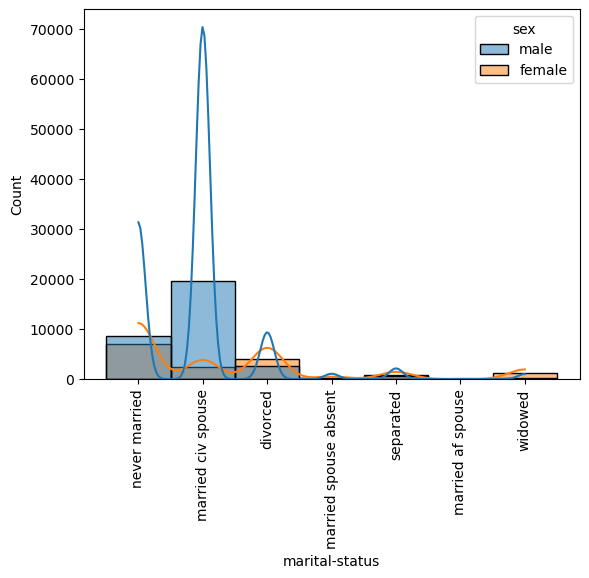

In [34]:
sns.histplot(data=df,x="marital-status",hue="sex",kde=True)
plt.xticks(rotation=90)
plt.show()

<span style="color:salmon;"> EDA 2(boxplot)</span>

<AxesSubplot:xlabel='age', ylabel='marital-status'>

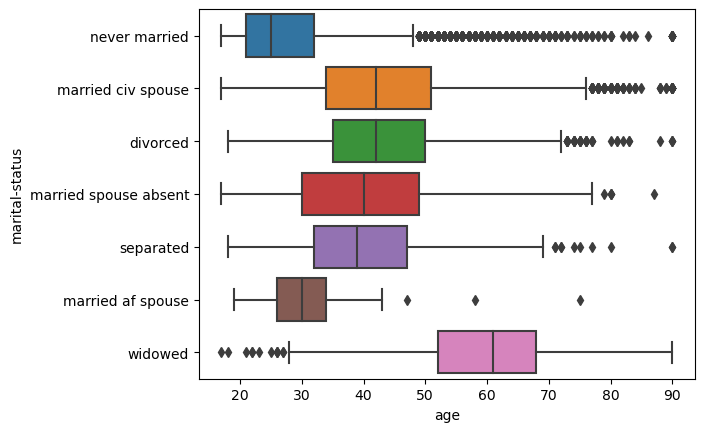

In [35]:
sns.boxplot(x=df["age"],y=df["marital-status"])# again using boxplot

<AxesSubplot:xlabel='hours-per-week', ylabel='education'>

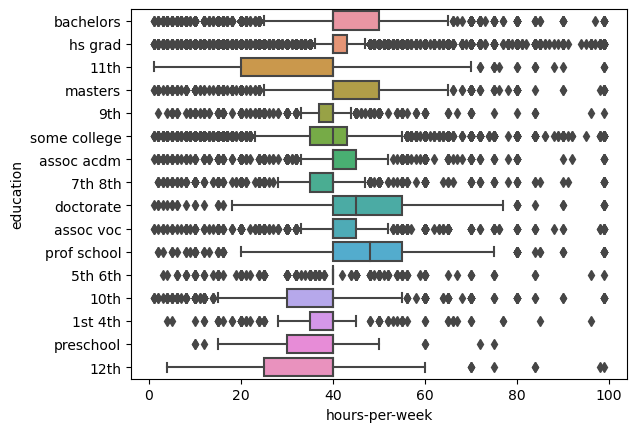

In [36]:
sns.boxplot(x=df["hours-per-week"],y=df["education"])

<span style="color:salmon;"> EDA 3(histogram)</span>

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education-num'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>]], dtype=object)

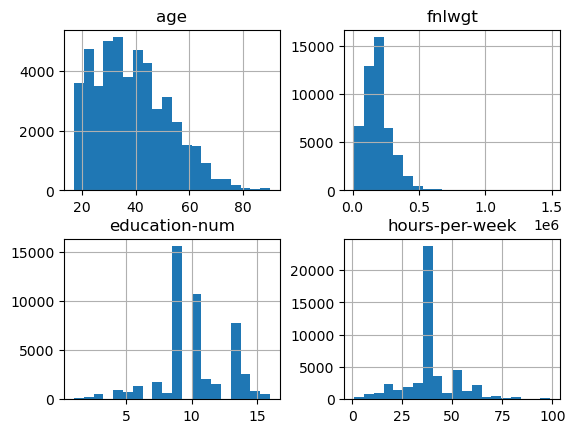

In [37]:
df[columns_numerical].hist(bins=20)# histogram

<span style="color:olive;">Cleaning/Preprocessing 9 (handling outliers)</span>

In [38]:
for i in columns_numerical:# handling outliers of columns 
    mean=df[i].mean()
    std=df[i].std()
    thresold=3*std
    df=df[(df[i]>= mean-thresold) & (df[i]<= mean+thresold)]

In [39]:
df["fnlwgt_log"]=np.log1p(df["fnlwgt"])# log transformation of skewed column

<AxesSubplot:>

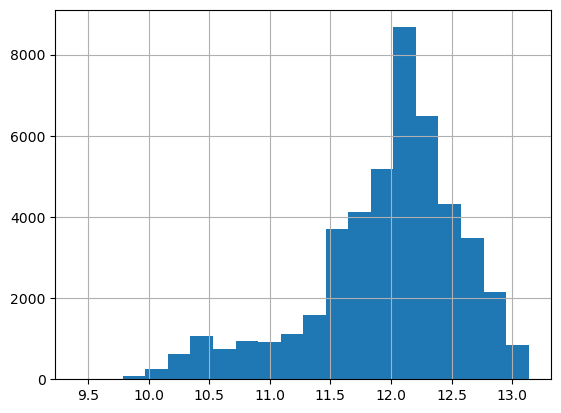

In [40]:
df["fnlwgt_log"].hist(bins=20)

<span style="color:salmon;">EDA 4(chi2 test)</span>

In [41]:
contigency=pd.crosstab(df["age_group"],df["income"])# chi2 test to find dependence of two fetures
chi2, p, dof, expected=stats.chi2_contingency(contigency)
print(chi2,p)

3640.361844644385 0.0


In [42]:
contigency=pd.crosstab(df["income"],df["education"])
chi2, p, dof, expected=stats.chi2_contingency(contigency)
print(chi2,p)

6199.074677541751 0.0


In [43]:
contigency=pd.crosstab(df["income"],df["fnlwgt"])
chi2, p, dof, expected=stats.chi2_contingency(contigency)
print(chi2,p)

29295.34361315696 5.728178104345718e-18


In [44]:
print(df.dtypes)

age                      int64
workclass               object
fnlwgt                   int64
education               object
education-num            int64
marital-status          object
occupation              object
relationship            object
race                    object
sex                     object
hours-per-week           int64
native-country          object
income                  object
age_group             category
hours-per-week-cat    category
education-num-cat     category
fnlwgt_log             float64
dtype: object


In [45]:
print(df["relationship"].value_counts())

husband           18618
not in family     11899
own child          7316
unmarried          4894
wife               2219
other relative     1388
Name: relationship, dtype: int64


<span style="color:salmon;"> EDA 5(value counts in column)</span>

<AxesSubplot:>

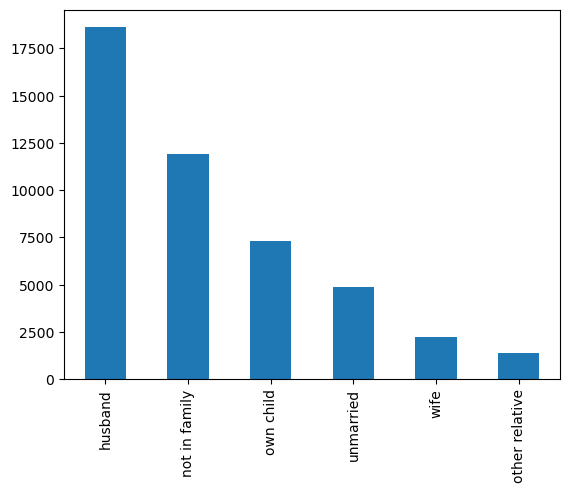

In [46]:
df["relationship"].value_counts().plot(kind="bar")#value counts to check distribution

In [47]:
df["relationship"]=df["relationship"].replace(["unmarried","wife","other relative","own child","own child"],"others")

<span style="color:salmon;">EDA 6(pairplot with target income)</span>

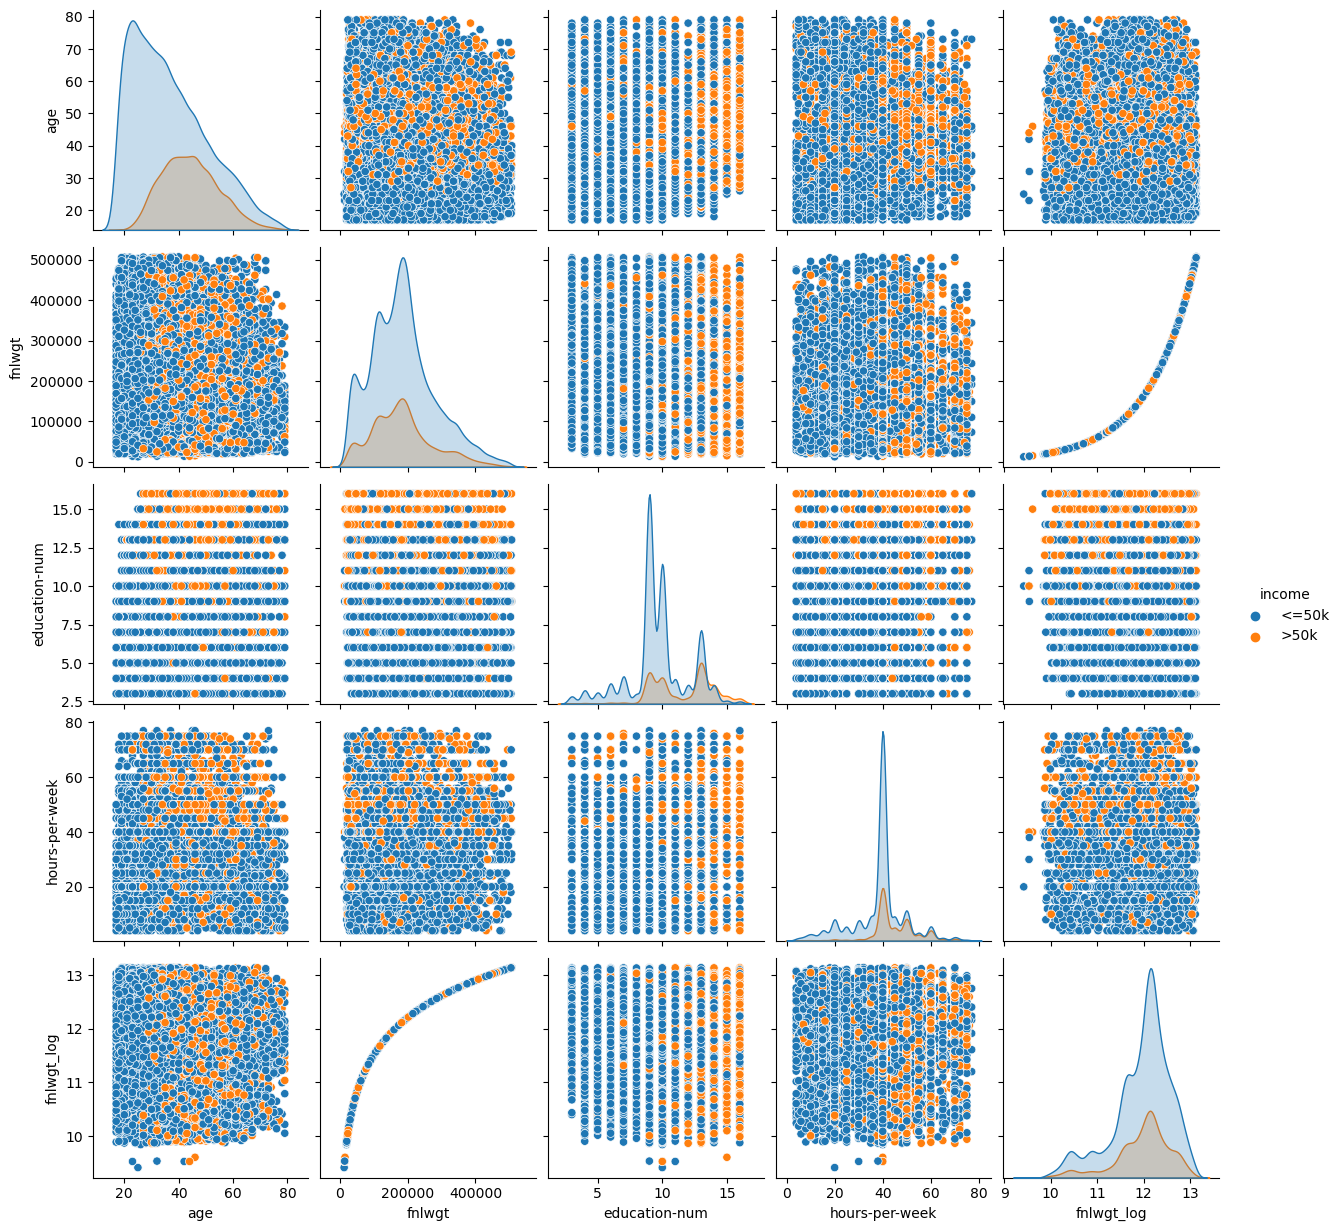

In [48]:
sns.pairplot(df,hue="income")#pairplot all numerical column with target income

<span style="color:salmon;">EDA 5(countplot or value counts)</span>

<AxesSubplot:xlabel='income', ylabel='count'>

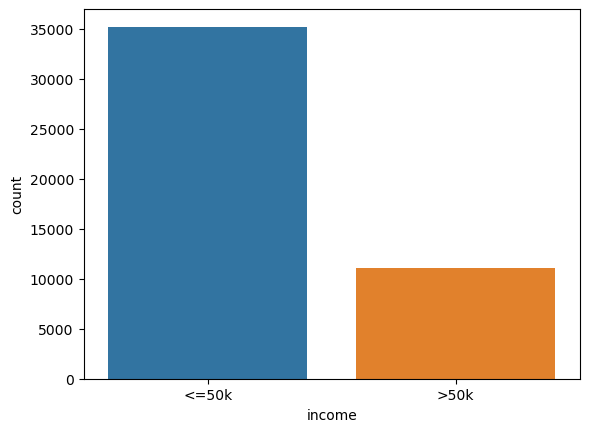

In [49]:
sns.countplot(x="income",data=df)

<span style="color:salmon;">EDA 7(scatter plot)</span>

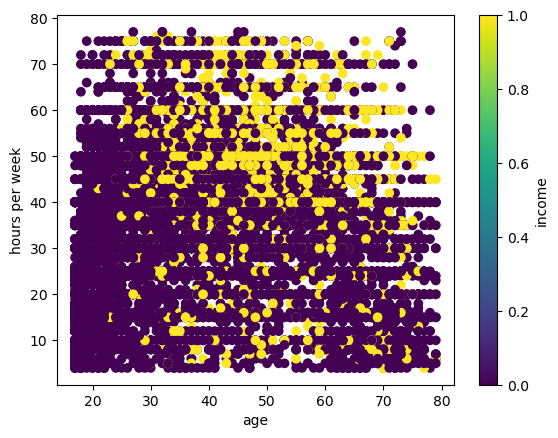

In [50]:
plt.scatter(df["age"],df["hours-per-week"],c=df["income"].apply(lambda x:1 if x==">50k" else 0))# scatterplot to identify relationship of two columns with income
plt.xlabel("age")
plt.ylabel("hours per week")
plt.colorbar(label="income")
plt.show()

<span style="color:salmon;">EDA 8(probability plot)</span>

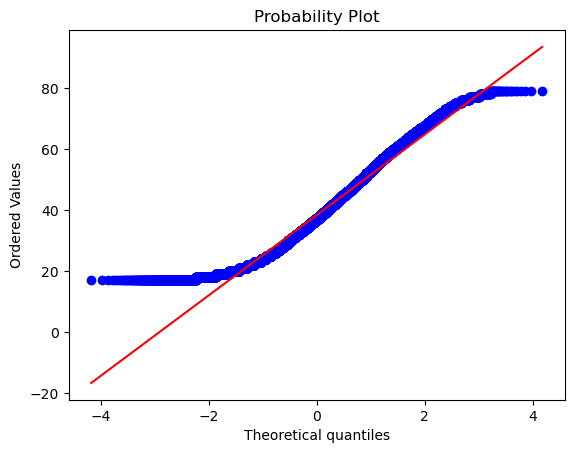

In [51]:
from scipy.stats import probplot# probability plot to check distribution

fig,ax=plt.subplots()
res=probplot(df["age"],dist="norm",plot=ax)
plt.show()

<span style="color:salmon;">EDA 9(f test)</span>

In [52]:
from scipy.stats import f_oneway# f-test for comparing means of one column with means of groups of other column
g1=df[df["income"]=="<=50k"]["hours-per-week"]
g2=df[df["income"]==">50k"]["hours-per-week"]
f, p=f_oneway(g1,g2)
print(f,p)

2873.3998665173126 0.0


In [53]:
from scipy.stats import f_oneway
g1=df[df["income"]=="<=50k"]["age"]
g2=df[df["income"]==">50k"]["age"]
f, p=f_oneway(g1,g2)
print(f,p)

2903.976305555358 0.0


In [54]:
print(df.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         state gov   77516  bachelors             13   
1   50  self emp not inc   83311  bachelors             13   
2   38           private  215646    hs grad              9   
3   53           private  234721       11th              7   
4   28           private  338409  bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       never married       adm clerical  not in family  white    male   
1  married civ spouse    exec managerial        husband  white    male   
2            divorced  handlers cleaners  not in family  white    male   
3  married civ spouse  handlers cleaners        husband  black    male   
4  married civ spouse     prof specialty         others  black  female   

   hours-per-week native-country income    age_group hours-per-week-cat  \
0              40  united states  <=50k  middle aged              ideal   
1              13  united states

<span style="color:salmon;">EDA 10(heatmap)</span>

<AxesSubplot:>

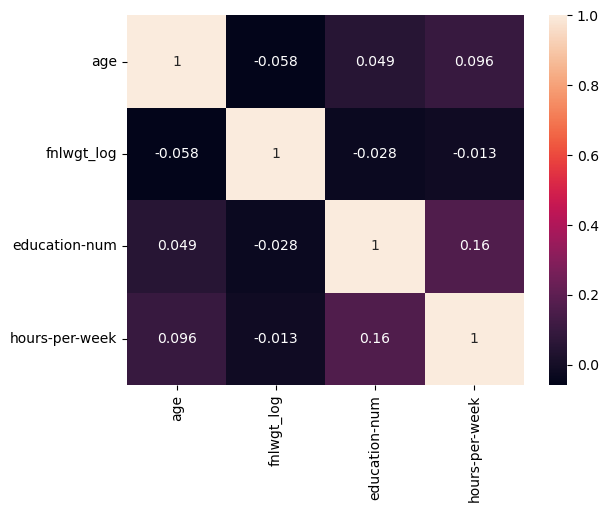

In [55]:
sns.heatmap(df[["age","fnlwgt_log","education-num","hours-per-week","income"]].corr(),annot=True)# heatmap to find most correlated features

In [56]:
df=df.drop(columns=["fnlwgt","fnlwgt_log","education-num","education","hours-per-week","age","education"])

<span style="color:olive;">Cleaning/Preprocessing 10 (label encoding)</span>

In [57]:
from sklearn.preprocessing import LabelEncoder# label encoding of categorical column
labelencoder=LabelEncoder()
columns_ordinal=["workclass","income","age_group","hours-per-week-cat","education-num-cat"]
for i in columns_ordinal:
    df[i]=labelencoder.fit_transform(df[i])

In [58]:
print(df.head())

   workclass      marital-status         occupation   relationship   race  \
0          6       never married       adm clerical  not in family  white   
1          5  married civ spouse    exec managerial        husband  white   
2          3            divorced  handlers cleaners  not in family  white   
3          3  married civ spouse  handlers cleaners        husband  black   
4          3  married civ spouse     prof specialty         others  black   

      sex native-country  income  age_group  hours-per-week-cat  \
0    male  united states       0          1                   1   
1    male  united states       0          1                   2   
2    male  united states       0          1                   1   
3    male  united states       0          1                   1   
4  female           cuba       0          3                   1   

   education-num-cat  
0                  1  
1                  1  
2                  2  
3                  3  
4                  

In [59]:
print(df["native-country"].value_counts())

united states                 42530
mexico                          785
philippines                     282
germany                         205
canada                          179
puerto rico                     174
india                           148
cuba                            131
el salvador                     127
england                         122
china                           118
south                           109
jamaica                         104
italy                            97
dominican republic               89
japan                            87
poland                           85
vietnam                          81
columbia                         79
guatemala                        73
haiti                            70
taiwan                           63
iran                             59
portugal                         56
greece                           45
ecuador                          43
peru                             43
nicaragua                   

<span style="color:olive;">Cleaning/Preprocessing 11 (capping extreme values)</span>

In [60]:
df["native-country"]=df["native-country"].apply(lambda x: "usa" if x=="united states" else "others")#capping values as there are so many countries

In [61]:
print(df["sex"].value_counts())

male      30827
female    15507
Name: sex, dtype: int64


In [62]:
print(df["race"].value_counts())

white                 39847
black                  4326
asian pac islander     1343
amer indian eskimo      454
other                   364
Name: race, dtype: int64


In [63]:
df["race"]=df["race"].apply(lambda x: "white" if x=="white" else "others")# capping races as well

In [64]:
print(df["occupation"].value_counts())

craft repair         8441
prof specialty       5835
exec managerial      5815
adm clerical         5436
sales                5273
other service        4608
machine op inspct    2875
transport moving     2209
handlers cleaners    1978
tech support         1392
farming fishing      1312
protective serv       941
priv house serv       205
armed forces           14
Name: occupation, dtype: int64


In [65]:
df["occupation"]=df["occupation"].replace(["other service","machine op inspct","transport moving","handlers cleaners","tech support","farming fishing","protective serv","priv house serv","armed forces","sales"],"others")
# many occupation, so its better to cap

In [66]:
print(df["marital-status"].value_counts())

married civ spouse       21143
never married            15374
divorced                  6398
separated                 1453
widowed                   1379
married spouse absent      554
married af spouse           33
Name: marital-status, dtype: int64


In [67]:
df["marital-status"]=df["marital-status"].replace(["divorced","separated","widowed","married spouse absent","married af spouse"],"others")
# capping marital-status as well

<span style="color:olive;">Cleaning/Preprocessing 10 (one hot encoding)</span>

In [68]:
df=pd.get_dummies(df, columns=["occupation","relationship","race","sex","native-country","marital-status"],drop_first=True)
#one-hot encoding

In [69]:
print(df.head())

   workclass  income  age_group  hours-per-week-cat  education-num-cat  \
0          6       0          1                   1                  1   
1          5       0          1                   2                  1   
2          3       0          1                   1                  2   
3          3       0          1                   1                  3   
4          3       0          3                   1                  1   

   occupation_craft repair  occupation_exec managerial  occupation_others  \
0                        0                           0                  0   
1                        0                           1                  0   
2                        0                           0                  1   
3                        0                           0                  1   
4                        0                           0                  0   

   occupation_prof specialty  relationship_not in family  relationship_others  \
0          

<span style="color:salmon;">EDA 11(pricipal component analysis)</span>

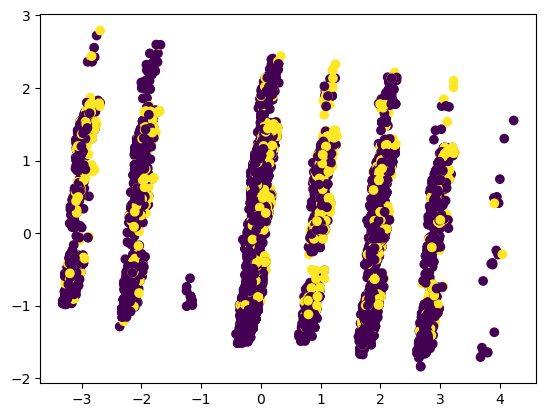

In [70]:
from sklearn.decomposition import PCA#PCA to find important features, not dropping columns until phase 2 
pca=PCA(n_components=2)
res=pca.fit_transform(df.drop(columns=["income"]))
plt.scatter(res[:,0],res[:,1],c=df["income"])
plt.show()

In [71]:
df.to_csv("/Users/hp/Downloads/adult_tmp.csv",index=False)